In [25]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt 

In [26]:
data=pd.read_csv("pima_diabetes.csv")
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
x=data.drop(columns="class",axis=1)
y=data["class"]

In [56]:
stdn=StandardScaler()
x=stdn.fit_transform(x)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [71]:
k_range=range(15,20)
k_scores=[]

for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.7617689500042442, 0.7474068415244886, 0.7669892199303965, 0.7552499787793905, 0.7656990068754774]


Text(0, 0.5, 'accuracy')

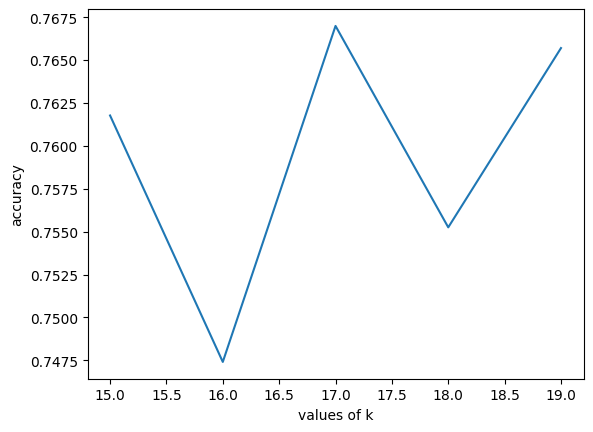

In [72]:
plt.plot(k_range,k_scores)
plt.xlabel("values of k")
plt.ylabel("accuracy")

In [76]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [77]:
y_pred=model.predict(x_test)
print("testing accuracy = ",accuracy_score(y_test,y_pred))

testing accuracy =  0.7337662337662337


In [79]:
y_pred=model.predict(x_train)
print("training accuracy = ",accuracy_score(y_train,y_pred))

training accuracy =  0.7866449511400652
